In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
movies = pd.read_csv("2013_movies.csv")

In [10]:
movies

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11
46,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100,2013-01-18
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,2013-01-25
...,...,...,...,...,...,...,...
59,The Secret Life of Walter Mitty,90000000.0,58236838,Ben Stiller,PG,114,2013-12-25
91,Grudge Match,40000000.0,29807260,Peter Segal,PG-13,113,2013-12-25
27,The Wolf of Wall Street,100000000.0,116900694,Martin Scorsese,R,180,2013-12-25
23,Lone Survivor,40000000.0,125095601,Peter Berg,R,121,2013-12-25


In [5]:
movies.isnull().any()

Title                 False
Budget                 True
DomesticTotalGross    False
Director               True
Rating                False
Runtime               False
ReleaseDate           False
dtype: bool

## Challenge 1

Plot domestic total gross over time.

In [47]:
movies["ReleaseDate"] = pd.to_datetime(movies.ReleaseDate)

In [48]:
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11
46,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100,2013-01-18
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,2013-01-25


In [49]:
movies = movies.sort_values("ReleaseDate")
by_time = movies.groupby("ReleaseDate")["DomesticTotalGross"].mean().reset_index()

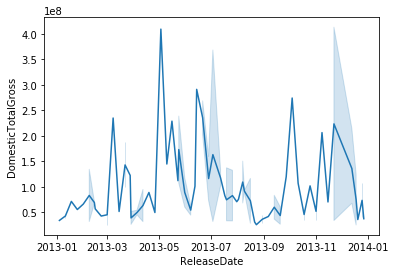

In [50]:
sns.lineplot("ReleaseDate", "DomesticTotalGross", data=movies)

## Challenge 2

Plot runtime vs. domestic total gross.

In [51]:
movies.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')

In [52]:
movies.Runtime.dtype

dtype('int64')

Text(0.5, 0, 'Domestic Total Gross')

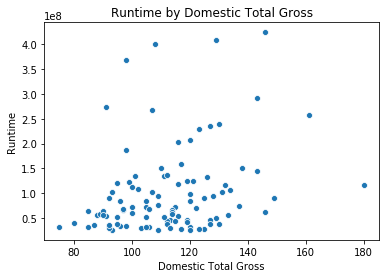

In [60]:
sns.scatterplot(movies["Runtime"], movies["DomesticTotalGross"])
plt.title("Runtime by Domestic Total Gross")
plt.ylabel("Runtime")
plt.xlabel("Domestic Total Gross")

## Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [71]:
movies.Rating.unique()

array(['R', 'PG-13', 'PG', 'G'], dtype=object)

In [62]:
mean_runtime_dtg_bymovies = movies.groupby("Rating")["Runtime", "DomesticTotalGross"].mean()

In [63]:
mean_runtime_dtg_bymovies

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


## Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

In [79]:
movies.Rating.unique()
    

array(['R', 'PG-13', 'PG', 'G'], dtype=object)

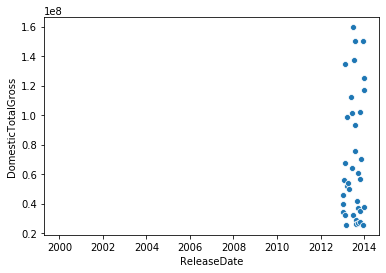

In [97]:
d = movies[movies["Rating"]=="R"][["ReleaseDate", "DomesticTotalGross"]]
sns.scatterplot(d["ReleaseDate"], d["DomesticTotalGross"])

In [104]:
lists=[]
for i in movies.Rating.unique():
    lists.append(movies[movies["Rating"]==i][["ReleaseDate", "DomesticTotalGross"]])

In [110]:
for i in lists:
    print(type(i))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


<Figure size 1440x720 with 0 Axes>

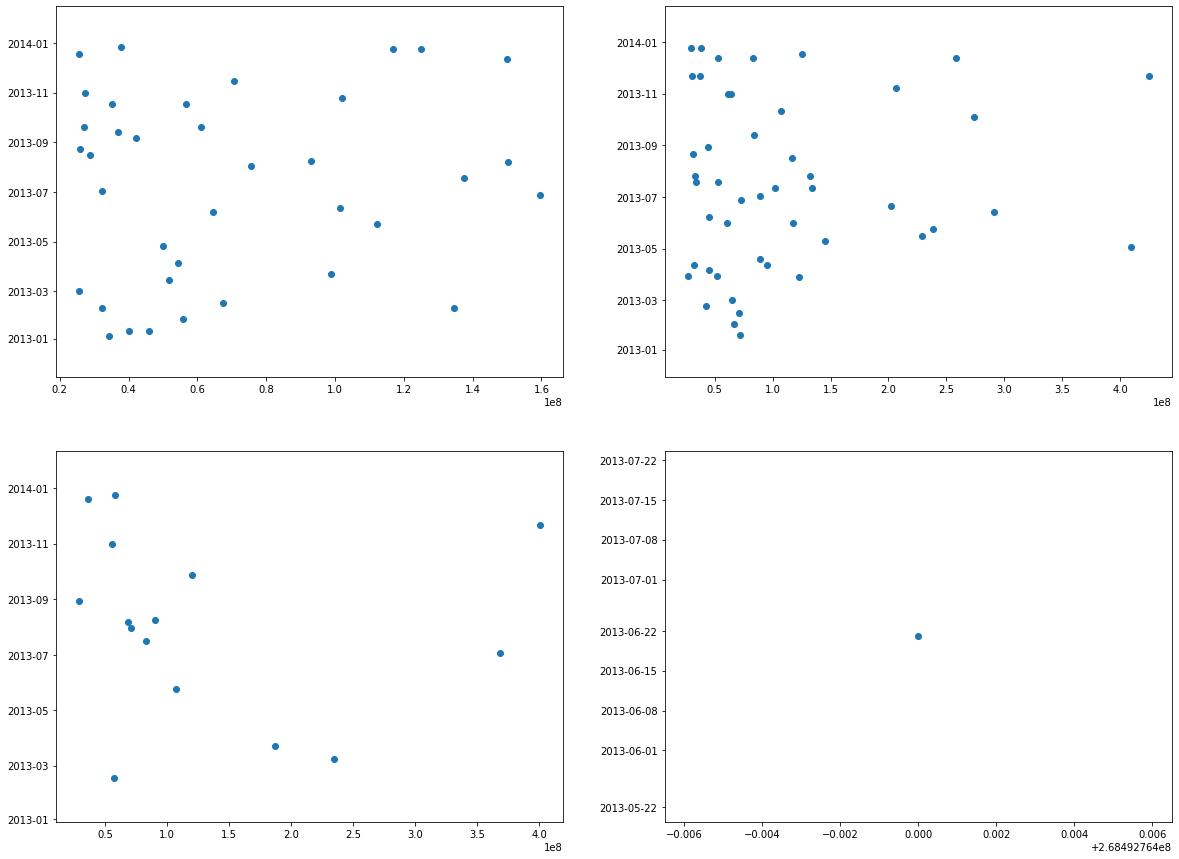

In [123]:
plt.figure(figsize=(20,10))
fig, ax = plt.subplots(2,2, figsize=(20, 15))
ax[0,0].scatter(lists[0]["DomesticTotalGross"], lists[0]["ReleaseDate"])
ax[0,1].scatter(lists[1]["DomesticTotalGross"], lists[1]["ReleaseDate"])
ax[1,0].scatter(lists[2]["DomesticTotalGross"], lists[2]["ReleaseDate"])
ax[1,1].scatter(lists[3]["DomesticTotalGross"], lists[3]["ReleaseDate"])

## Challenge 5

What director in your dataset has the highest gross per movie?

In [130]:
movies.groupby("Director")["DomesticTotalGross"].max().sort_values(ascending=False).head()

Director
Francis Lawrence             424668047
Shane Black                  409013994
Chris BuckJennifer Lee       400738009
Pierre CoffinChris Renaud    368061265
Zack Snyder                  291045518
Name: DomesticTotalGross, dtype: int64

**Francis Lawrence**

## Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [134]:
movies = pd.read_csv("2013_movies.csv")

In [142]:
movies.head(3)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,month
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,11
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,5
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,11


In [140]:
movies["month"] = pd.to_datetime(movies["ReleaseDate"]).dt.month

In [149]:
by_month = movies.groupby("month")["DomesticTotalGross"].mean().reset_index()
by_month

,month,DomesticTotalGross
0,1,4.954324e+07
1,2,6.738601e+07
2,3,9.609710e+07
3,4,6.094072e+07
4,5,1.774097e+08
5,6,1.506500e+08
6,7,1.057807e+08
7,8,6.853126e+07
8,9,6.171231e+07
9,10,1.150270e+08


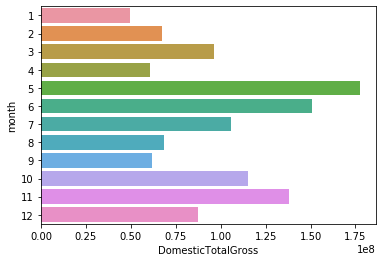

In [152]:
sns.barplot(data= by_month, x="DomesticTotalGross", y="month", orient="h")

### STD of mean

Text(0.5, 1.0, 'Mean Domestic Total Gross by Month in 2013')

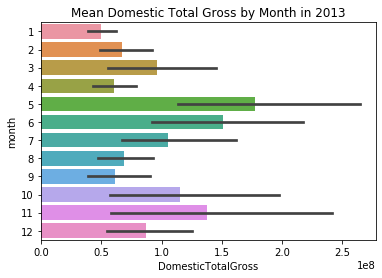

In [157]:
sns.barplot(data= movies, x="DomesticTotalGross", y="month", orient="h")
plt.title("Mean Domestic Total Gross by Month in 2013")